In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
import tensorflow as tf

In [2]:
train = pd.read_csv("/kaggle/input/fashionmnist/fashion-mnist_train.csv")
test = pd.read_csv("/kaggle/input/fashionmnist/fashion-mnist_test.csv")

In [3]:
train

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0          2       0       0       0       0       0       0       0       0   
1          9       0       0       0       0       0       0       0       0   
2          6       0       0       0       0       0       0       0       5   
3          0       0       0       0       1       2       0       0       0   
4          3       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
59995      9       0       0       0       0       0       0       0       0   
59996      1       0       0       0       0       0       0       0       0   
59997      8       0       0       0       0       0       0       0       0   
59998      8       0       0       0       0       0       0       0       0   
59999      7       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
0           0  ...         0         0         0         0         0   
1           0  ...         0         0         0         0         0   
2           0  ...         0         0         0        30        43   
3           0  ...         3         0         0         0         0   
4           0  ...         0         0         0         0         0   
...       ...  ...       ...       ...       ...       ...       ...   
59995       0  ...         0         0         0         0         0   
59996       0  ...        73         0         0         0         0   
59997       0  ...       160       162       163       135        94   
59998       0  ...         0         0         0         0         0   
59999       0  ...         0         0         0         0         0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
0             0         0         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3             1         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
59995         0         0         0         0         0  
59996         0         0         0         0         0  
59997         0         0         0         0         0  
59998         0         0         0         0         0  
59999         0         0         0         0         0  

[60000 rows x 785 columns]

In [4]:
test

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0         0       0       0       0       0       0       0       0       9   
1         1       0       0       0       0       0       0       0       0   
2         2       0       0       0       0       0       0      14      53   
3         2       0       0       0       0       0       0       0       0   
4         3       0       0       0       0       0       0       0       0   
...     ...     ...     ...     ...     ...     ...     ...     ...     ...   
9995      0       0       0       0       0       0       0       0       0   
9996      6       0       0       0       0       0       0       0       0   
9997      8       0       0       0       0       0       0       0       0   
9998      8       0       1       3       0       0       0       0       0   
9999      1       0       0       0       0       0       0       0     140   

      pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0          8  ...       103        87        56         0         0         0   
1          0  ...        34         0         0         0         0         0   
2         99  ...         0         0         0         0        63        53   
3          0  ...       137       126       140         0       133       224   
4          0  ...         0         0         0         0         0         0   
...      ...  ...       ...       ...       ...       ...       ...       ...   
9995       0  ...        32        23        14        20         0         0   
9996       0  ...         0         0         0         2        52        23   
9997       0  ...       175       172       172       182       199       222   
9998       0  ...         0         0         0         0         0         1   
9999     119  ...       111        95        75        44         1         0   

      pixel781  pixel782  pixel783  pixel784  
0            0         0         0         0  
1            0         0         0         0  
2           31         0         0         0  
3          222        56         0         0  
4            0         0         0         0  
...        ...       ...       ...       ...  
9995         1         0         0         0  
9996        28         0         0         0  
9997        42         0         1         0  
9998         0         0         0         0  
9999         0         0         0         0  

[10000 rows x 785 columns]

In [5]:
train_np = train.values
test_np = test.values

görsel0 = train_np[:,1:].reshape(60000,28,28)[0]

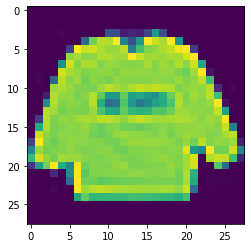

In [6]:
plt.imshow(görsel0);

In [7]:
np.random.shuffle(train_np)
np.random.shuffle(test_np)

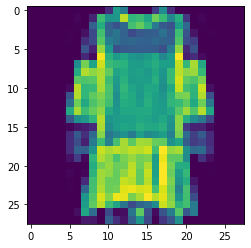

In [8]:
plt.imshow(görsel0);

In [9]:
x_train = train_np[:,1:].reshape(-1,28,28,1)/255.0
y_train = train_np[:,0].astype(np.int32)

x_test = test_np[:,1:].reshape(-1,28,28,1)/255.0
y_test = test_np[:,0].astype(np.int32)

y_train = tf.keras.utils.to_categorical(y_train,num_classes=len(set(y_train)))
y_test = tf.keras.utils.to_categorical(y_test,num_classes=len(set(y_test)))

In [10]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
from tensorflow.keras.optimizers import RMSprop

In [13]:
cnn_model = Sequential()
cnn_model.add(Conv2D(12,(1,1)))
cnn_model.add(Activation("relu"))
cnn_model.add(MaxPooling2D())

cnn_model.add(Conv2D(12,(1,1)))
cnn_model.add(Activation("relu"))
cnn_model.add(MaxPooling2D())

cnn_model.add(Flatten())
cnn_model.add(Dense(300))
cnn_model.add(Activation("relu"))
cnn_model.add(Dense(10))
cnn_model.add(Activation("softmax"))

cnn_model.compile(loss="categorical_crossentropy",
                 optimizer=RMSprop(learning_rate=0.0004),
                 metrics=["accuracy"])

hist = cnn_model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),epochs=200,batch_size=60000)

2022-12-28 10:24:52.469576: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-12-28 10:24:52.973485: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200
1/1 [==============================] - 9s 9s/step - loss: 2.2927 - accuracy: 0.1005 - val_loss: 2.2293 - val_accuracy: 0.1386
Epoch 2/200
1/1 [==============================] - 7s 7s/step - loss: 2.2295 - accuracy: 0.1397 - val_loss: 2.1801 - val_accuracy: 0.3076
Epoch 3/200
1/1 [==============================] - 7s 7s/step - loss: 2.1802 - accuracy: 0.3137 - val_loss: 2.1354 - val_accuracy: 0.4362
Epoch 4/200
1/1 [==============================] - 7s 7s/step - loss: 2.1355 - accuracy: 0.4383 - val_loss: 2.0935 - val_accuracy: 0.4706
Epoch 5/200
1/1 [==============================] - 7s 7s/step - loss: 2.0935 - accuracy: 0.4735 - val_loss: 2.0531 - val_accuracy: 0.5051
Epoch 6/200
1/1 [==============================] - 7s 7s/step - loss: 2.0531 - accuracy: 0.5067 - val_loss: 2.0138 - val_accuracy: 0.5142
Epoch 7/200
1/1 [==============================] - 7s 7s/step - loss: 2.0138 - accuracy: 0.5158 - val_loss: 1.9752 - val_accuracy: 0.5293
Epoch 8/200
1/1 [=================

In [ ]:
for i in hist.history.keys():
    plt.plot(hist.history[i],label=i)
    plt.title(i)